# STEPS TO To get scrap Crypto website API:


# go to the website, scroll down and click on crypto API.
# signin if you have an account, if not then create an account to log you in.
# click on the documentation, under quick guide click on python, then copy the code and paste it on jupyter notebook.
# click on the documentation, under authentication copy the first website known as domain key and come and use it to replace the one first part of the url on jupyter notebook
# copy the API key and use it to replace the key in the header.


In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

In [3]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com./v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '7b2e75ce-4d88-4ba4-a273-5d36d3c24323',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

# I had to go and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# into the Anaconda prompt to change this to allow to pull data
# i also copy the link there to jupyter for it to work.

{'status': {'timestamp': '2024-11-23T14:29:12.365Z', 'error_code': 0, 'error_message': None, 'elapsed': 100, 'credit_count': 1, 'notice': None, 'total_count': 10157}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11806, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'pa

In [4]:
type(data)

dict

In [5]:
import pandas as pd

pd.set_option("display.max_columns", None)

pd.set_option("display.max_rows", None)

In [9]:
df = pd.json_normalize(data["data"])

df['timestamp'] = pd.to_datetime("now") #Adding new column

df.head()

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11806,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.0,1.978631e+07,1.978631e+07,False,NaN,1,NaN,NaN,None,2024-11-23T14:27:00.000Z,98759.895066,5.956463e+10,-33.0882,-0.119614,0.953542,8.587876,45.953508,56.739703,53.944767,1.954094e+12,57.6971,2.073958e+12,None,2024-11-23T14:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-23 15:29:14.003764
1,1027,Ethereum,ETH,ethereum,9586,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.204297e+08,1.204297e+08,True,NaN,2,NaN,NaN,None,2024-11-23T14:27:00.000Z,3475.023579,3.560361e+10,-21.0073,1.777992,5.396947,9.643699,37.865387,33.715310,25.640061,4.184962e+11,12.3566,4.184962e+11,None,2024-11-23T14:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-23 15:29:14.003764
2,825,Tether USDt,USDT,tether,104856,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.321052e+11,1.329444e+11,True,NaN,3,NaN,NaN,None,2024-11-23T14:27:00.000Z,1.001098,1.685209e+11,-8.5582,-0.006628,0.058214,0.101890,0.157190,0.094021,0.066625,1.322502e+11,3.9050,1.330903e+11,None,2024-11-23T14:27:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-11-23 15:29:14.003764
3,5426,Solana,SOL,solana,793,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.746552e+08,5.887652e+08,True,NaN,4,NaN,NaN,None,2024-11-23T14:27:00.000Z,261.073316,6.028647e+09,-41.6000,0.721509,2.279382,19.869792,48.875624,79.761301,64.225391,1.239198e+11,3.6616,1.537109e+11,None,2024-11-23T14:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-23 15:29:14.003764
4,1839,BNB,BNB,bnb,2287,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.440105e+08,1.440105e+08,False,NaN,5,NaN,NaN,None,2024-11-23T14:28:00.000Z,673.403735,3.050882e+09,13.7179,0.487816,8.778440,7.246096,14.012392,11.532625,17.056084,9.697718e+10,2.8655,9.697718e+10,None,2024-11-23T14:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-23 15:29:14.003764


In [11]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com./v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '7b2e75ce-4d88-4ba4-a273-5d36d3c24323',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

# I had to go and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# into the Anaconda prompt to change this to allow to pull data
# i also copy the link there to jupyter for it to work.

    df2 = pd.json_normalize(data["data"])
    df2['timestamp'] = pd.to_datetime("now")
    # Use pd.concat instead of append
    df = pd.concat([df, df2], ignore_index=True) 
    
    # Write to CSV
    file_path = r"C:\Users\DAVID\Desktop\LEARN\Portfolio projects\API.csv"
    if not os.path.isfile(file_path):
        df.to_csv(file_path, index=False)
    else:
        df.to_csv(file_path, mode='a', header=False, index=False)

    #if not os.path.isfile(r"C:\Users\DAVID\Desktop\LEARN\Portfolio projects\API.csv"):
    #    df.to_csv(r"C:\Users\DAVID\Desktop\LEARN\Portfolio projects\API.csv", header = "column_names")
    #else:
    #    df.to_csv(r"C:\Users\DAVID\Desktop\LEARN PYTHON\pandas\API.csv", mode = "a", header = False)
        
    
   

In [13]:
import os
from time import time
from time import sleep
import sys  # Import sys for sys.exit()

try:
    for item in range(333):
        api_runner()  # Ensure api_runner is defined
        print("API Runner completed.")
        sleep(1)  # Sleep for one second
except KeyboardInterrupt:
    print("Script terminated by user.")
    sys.exit(0)  # Exit gracefully
except Exception as e:
    print(f"An error occurred: {e}")
    sys.exit(1)  # Exit with error status

finally:
    print("Cleaning up resources if necessary...")


API Runner completed.
API Runner completed.
API Runner completed.
API Runner completed.
Script terminated by user.
Cleaning up resources if necessary...


AttributeError: 'tuple' object has no attribute 'tb_frame'

In [15]:
df = pd.read_csv(r"C:\Users\DAVID\Desktop\LEARN\Portfolio projects\API.csv")
df.head()


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11806,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.0,1.978571e+07,1.978571e+07,False,NaN,1,NaN,NaN,NaN,2024-11-22T02:42:00.000Z,98795.323520,1.056923e+11,43.9301,0.754719,4.865151,11.819730,47.288339,54.806704,54.576534,1.954736e+12,59.6049,2.074702e+12,NaN,2024-11-22T02:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-22 02:44:23.351014
1,1027,Ethereum,ETH,ethereum,9580,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.204284e+08,1.204284e+08,True,NaN,2,NaN,NaN,NaN,2024-11-22T02:42:00.000Z,3336.744854,5.240713e+10,75.5564,0.388975,9.791185,8.422410,27.804602,26.821723,21.139942,4.018388e+11,12.2531,4.018388e+11,NaN,2024-11-22T02:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-22 02:44:23.351014
2,825,Tether USDt,USDT,tether,104670,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,1.307188e+11,1.319444e+11,True,NaN,3,NaN,NaN,NaN,2024-11-22T02:42:00.000Z,1.000893,2.002338e+11,40.5298,-0.015552,-0.001156,0.068210,0.164646,0.074693,0.031758,1.308355e+11,3.9900,1.320622e+11,NaN,2024-11-22T02:42:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-11-22 02:44:23.351014
3,5426,Solana,SOL,solana,793,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.747005e+08,5.887929e+08,True,NaN,4,NaN,NaN,NaN,2024-11-22T02:42:00.000Z,258.043513,1.100177e+10,72.9041,0.915041,11.688499,22.637581,55.188173,76.024263,68.059700,1.224934e+11,3.7335,1.519342e+11,NaN,2024-11-22T02:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-22 02:44:23.351014
4,1839,BNB,BNB,bnb,2286,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.440106e+08,1.440106e+08,False,NaN,5,NaN,NaN,NaN,2024-11-22T02:42:00.000Z,635.324148,2.862672e+09,32.6366,1.198433,6.628734,2.077881,7.545102,6.763460,8.405147,9.149342e+10,2.7895,9.149342e+10,NaN,2024-11-22T02:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-22 02:44:23.351014


# Quick Data Cleaning

In [17]:
pd.set_option("display.float_format", lambda x: "%.5f" % x)
pd.set_option("display.max_rows", None)
df.head()

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11806,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19785712.00000,19785712.00000,False,NaN,1,NaN,NaN,NaN,2024-11-22T02:42:00.000Z,98795.32352,105692270288.72652,43.93010,0.75472,4.86515,11.81973,47.28834,54.80670,54.57653,1954735818120.21851,59.60490,2074701793927.08008,NaN,2024-11-22T02:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-22 02:44:23.351014
1,1027,Ethereum,ETH,ethereum,9580,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120428391.07998,120428391.07998,True,NaN,2,NaN,NaN,NaN,2024-11-22T02:42:00.000Z,3336.74485,52407126253.91741,75.55640,0.38898,9.79119,8.42241,27.80460,26.82172,21.13994,401838814207.25342,12.25310,401838814207.25000,NaN,2024-11-22T02:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-22 02:44:23.351014
2,825,Tether USDt,USDT,tether,104670,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,130718783155.73712,131944368177.92068,True,NaN,3,NaN,NaN,NaN,2024-11-22T02:42:00.000Z,1.00089,200233839583.31424,40.52980,-0.01555,-0.00116,0.06821,0.16465,0.07469,0.03176,130835487336.83812,3.99000,132062166546.81000,NaN,2024-11-22T02:42:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-11-22 02:44:23.351014
3,5426,Solana,SOL,solana,793,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,474700525.35153,588792908.62278,True,NaN,4,NaN,NaN,NaN,2024-11-22T02:42:00.000Z,258.04351,11001765213.08841,72.90410,0.91504,11.68850,22.63758,55.18817,76.02426,68.05970,122493391226.67052,3.73350,151934190622.63000,NaN,2024-11-22T02:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-22 02:44:23.351014
4,1839,BNB,BNB,bnb,2286,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,144010606.10000,144010606.10000,False,NaN,5,NaN,NaN,NaN,2024-11-22T02:42:00.000Z,635.32415,2862671823.56261,32.63660,1.19843,6.62873,2.07788,7.54510,6.76346,8.40515,91493415592.46402,2.78950,91493415592.46001,NaN,2024-11-22T02:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-22 02:44:23.351014


In [19]:
df3 = df.groupby("name", sort=False)[["quote.USD.percent_change_1h", "quote.USD.percent_change_24h", "quote.USD.percent_change_7d", "quote.USD.percent_change_30d", "quote.USD.percent_change_60d", "quote.USD.percent_change_90d"]].mean()
df3.head()

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.45338,0.99779,10.48769,48.92665,55.72011,54.37604
Ethereum,0.36022,6.37790,7.81638,29.61391,26.15952,20.98525
Tether USDt,-0.00467,0.04955,0.05227,0.13161,0.05810,-0.00080
Solana,0.29636,7.30507,21.42652,55.86879,79.82162,64.19591
BNB,-0.10334,2.70226,0.40363,7.36662,5.64057,7.99681


# To visualize this data do the following:

In [22]:
df4 = df3.transpose()
df4.head()

name,Bitcoin,Ethereum,Tether USDt,Solana,BNB,XRP,Dogecoin,USDC,Cardano,TRON,Shiba Inu,Avalanche,Toncoin,Sui,Bitcoin Cash,Stellar,Polkadot
quote.USD.percent_change_1h,0.45338,0.36022,-0.00467,0.29636,-0.10334,3.29996,1.26472,0.00120,2.92155,0.41729,0.72016,1.45464,0.59443,0.81233,0.72291,2.67917,1.95003
quote.USD.percent_change_24h,0.99779,6.37790,0.04955,7.30507,2.70226,30.08941,2.91467,-0.00229,12.87210,0.33730,4.23169,10.72595,2.19368,3.97811,-5.49335,56.05453,34.76020
quote.USD.percent_change_7d,10.48769,7.81638,0.05227,21.42652,0.40363,75.74476,5.41557,-0.01293,45.63099,9.34464,3.09927,16.38566,4.00090,5.21490,15.47320,155.77992,50.88216
quote.USD.percent_change_30d,48.92665,29.61391,0.13161,55.86879,7.36662,174.82927,187.22493,0.00830,150.78374,24.75305,41.30062,41.25569,7.43988,90.70857,40.17909,374.55388,96.02964
quote.USD.percent_change_60d,55.72011,26.15952,0.05810,79.82162,5.64057,146.49388,267.10970,-0.00977,150.93635,30.53295,72.30888,37.14418,-1.47617,132.83632,44.52833,372.14946,80.37975


In [24]:
df4 = df3.stack()
df4.head()

name                                 
Bitcoin  quote.USD.percent_change_1h     0.45338
         quote.USD.percent_change_24h    0.99779
         quote.USD.percent_change_7d    10.48769
         quote.USD.percent_change_30d   48.92665
         quote.USD.percent_change_60d   55.72011
dtype: float64

In [26]:
type(df3)

pandas.core.frame.DataFrame

In [28]:
type(df4)

pandas.core.series.Series

In [30]:
df5 = df4.to_frame(name = "values")
df5.head()

values
name                                         
Bitcoin quote.USD.percent_change_1h   0.45338
        quote.USD.percent_change_24h  0.99779
        quote.USD.percent_change_7d  10.48769
        quote.USD.percent_change_30d 48.92665
        quote.USD.percent_change_60d 55.72011

In [32]:
type(df5)

pandas.core.frame.DataFrame

In [34]:
df5.count()

values    102
dtype: int64

In [36]:
index = pd.Index(range(90))

#df6 = df5.set_index(index)
df6 = df5.reset_index()
df6.head()

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.45338
1,Bitcoin,quote.USD.percent_change_24h,0.99779
2,Bitcoin,quote.USD.percent_change_7d,10.48769
3,Bitcoin,quote.USD.percent_change_30d,48.92665
4,Bitcoin,quote.USD.percent_change_60d,55.72011


In [38]:
df7 = df6.rename(columns={"level_1":"percent_change"})
df7.head()

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.45338
1,Bitcoin,quote.USD.percent_change_24h,0.99779
2,Bitcoin,quote.USD.percent_change_7d,10.48769
3,Bitcoin,quote.USD.percent_change_30d,48.92665
4,Bitcoin,quote.USD.percent_change_60d,55.72011


In [40]:
df7["percent_change"] = df7["percent_change"].replace(["quote.USD.percent_change_1h", "quote.USD.percent_change_24h", "quote.USD.percent_change_7d", "quote.USD.percent_change_30d", "quote.USD.percent_change_60d", "quote.USD.percent_change_90d"],["1h", "24h", "7d", "30d", "60d", "90d"])
df7.head()

,name,percent_change,values
0,Bitcoin,1h,0.45338
1,Bitcoin,24h,0.99779
2,Bitcoin,7d,10.48769
3,Bitcoin,30d,48.92665
4,Bitcoin,60d,55.72011


In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

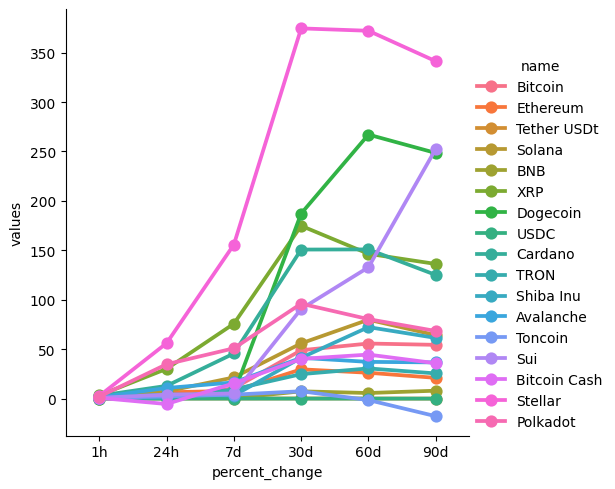

In [44]:
sns.catplot(x = "percent_change", y = "values", hue= "name", data = df7, kind = "point")

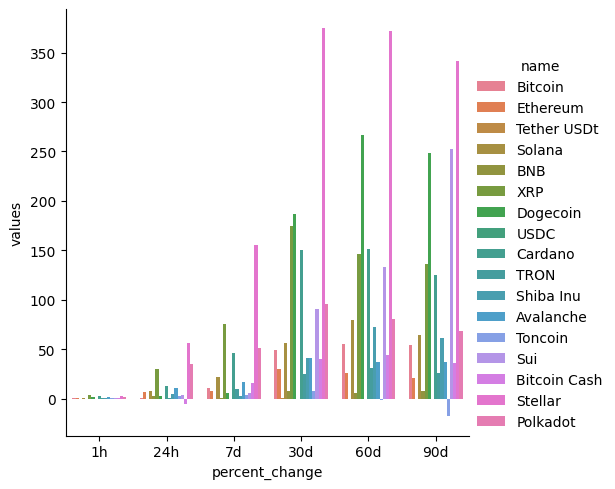

In [46]:
sns.catplot(x = "percent_change", y = "values", hue= "name", data = df7, kind = "bar")

In [48]:
df8 = df[["name", "quote.USD.price", "timestamp"]]
df8 = df8.query("name == 'Bitcoin'")
df8.head()

,name,quote.USD.price,timestamp
0,Bitcoin,98795.32352,2024-11-22 02:44:23.351014
15,Bitcoin,98795.32352,2024-11-22 02:44:23.351014
30,Bitcoin,98803.15531,2024-11-22 02:48:45.481591
45,Bitcoin,98803.15531,2024-11-22 02:48:48.703383
60,Bitcoin,98803.15531,2024-11-22 02:48:51.873177


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

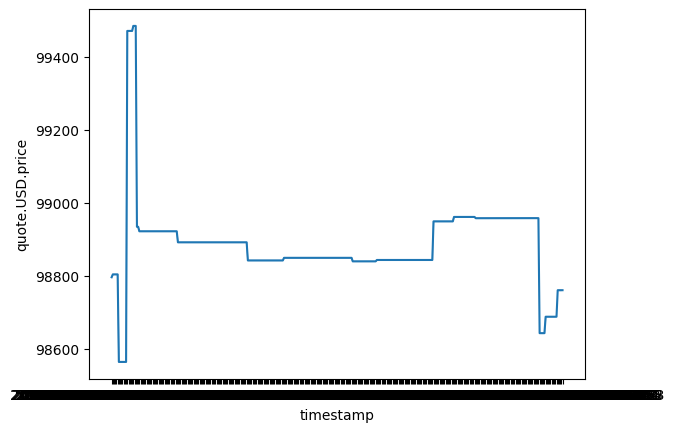

In [50]:
sns.lineplot(x="timestamp", y="quote.USD.price", data = df8)


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

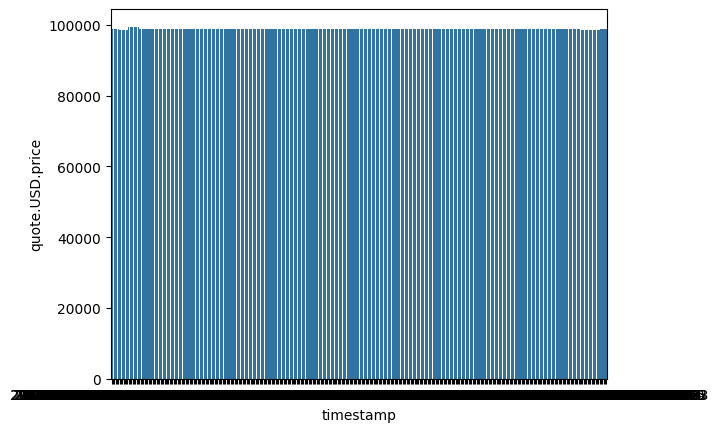

In [52]:
sns.barplot(x="timestamp", y="quote.USD.price", data = df8)